In [8]:
import sys
plist = ['/Applications/NEURON/lib/python']
for pd in plist:
    if pd in sys.path:
        sys.path.remove(pd)

In [9]:
import matplotlib.pyplot as plt
from neuron import h, rxd 

h.load_file('stdrun.hoc')

soma = h.Section(name='soma')
soma.L = soma.diam = 10
soma.insert('hh')
cyt = rxd.Region([soma],name='cyt',nrn_region='i')
na = rxd.Species(cyt,name='na',charge=1)

t = h.Vector().record(h._ref_t)
v = h.Vector().record(soma(0.5)._ref_v)
na_vec = h.Vector().record(soma(0.5)._ref_nai)
ina = h.Vector().record(soma(0.5)._ref_ina)

# current clamp stimuli
ics = [h.IClamp(soma(0.5)) for _ in range(2)]
for i, iclamp in enumerate(ics):
    iclamp.amp = 0.3
    iclamp.dur = 0.1
    iclamp.delay = 5 + i * 15

# initialize and run the simulation
h.finitialize(-65)
h.continuerun(50)


0.0

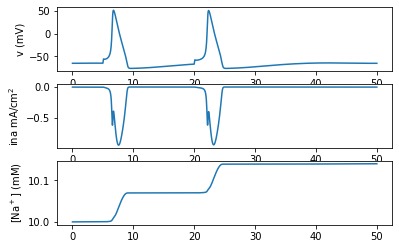

In [10]:
plot_vars = [(v, 'v (mV)'), (ina, 'ina mA/cm$^2$'), (na_vec, '[Na$^+$] (mM)')]
for i, (vec, name) in enumerate(plot_vars):
    plt.subplot(len(plot_vars), 1, i + 1)
    plt.plot(t, vec)
    plt.ylabel(name)
plt.show()